<a href="https://colab.research.google.com/github/sanskruti-1234/ML/blob/main/Practical_4_Bonus_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
df = pd.read_csv("Housing.csv")

In [5]:
for column in df.select_dtypes(include=['object']).columns:
    df[column] = df[column].map({'yes': 1, 'no': 0})

df.fillna(df.mean(), inplace=True)
X = df[['stories', 'parking']]
y = df['price']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [8]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_predictions = linear_reg.predict(X_test)


In [9]:
k_values = [3, 5, 7, 9, 11, 15]
mae_scores = []
mse_scores = []
rmse_scores = []

In [10]:
for k in k_values:
    knn_reg = KNeighborsRegressor(n_neighbors=k)
    knn_reg.fit(X_train, y_train)
    knn_predictions = knn_reg.predict(X_test)

    mae = mean_absolute_error(y_test, knn_predictions)
    mse = mean_squared_error(y_test, knn_predictions)
    rmse = np.sqrt(mse)

    mae_scores.append(mae)
    mse_scores.append(mse)
    rmse_scores.append(rmse)


In [12]:
print("Linear Regression:")
print(f"MAE: {mean_absolute_error(y_test, linear_predictions):.4f}")
print(f"MSE: {mean_squared_error(y_test, linear_predictions):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, linear_predictions)):.4f}")




Linear Regression:
MAE: 1391488.5445
MSE: 3355162631208.9702
RMSE: 1831710.3022


In [13]:
print("\nKNN Regression:")
for i, k in enumerate(k_values):
    print(f"k = {k}:")
    print(f"MAE: {mae_scores[i]:.4f}")
    print(f"MSE: {mse_scores[i]:.4f}")
    print(f"RMSE: {rmse_scores[i]:.4f}")


KNN Regression:
k = 3:
MAE: 1615972.4771
MSE: 4294168545361.8755
RMSE: 2072237.5697
k = 5:
MAE: 1499136.6972
MSE: 3795915587247.7065
RMSE: 1948310.9575
k = 7:
MAE: 1421790.8257
MSE: 3540303082614.6787
RMSE: 1881569.3138
k = 9:
MAE: 1424391.9674
MSE: 3623510297611.5298
RMSE: 1903552.0213
k = 11:
MAE: 1427163.8532
MSE: 3705642521760.2393
RMSE: 1925004.5511
k = 15:
MAE: 1446571.5352
MSE: 3669417845024.9043
RMSE: 1915572.4588


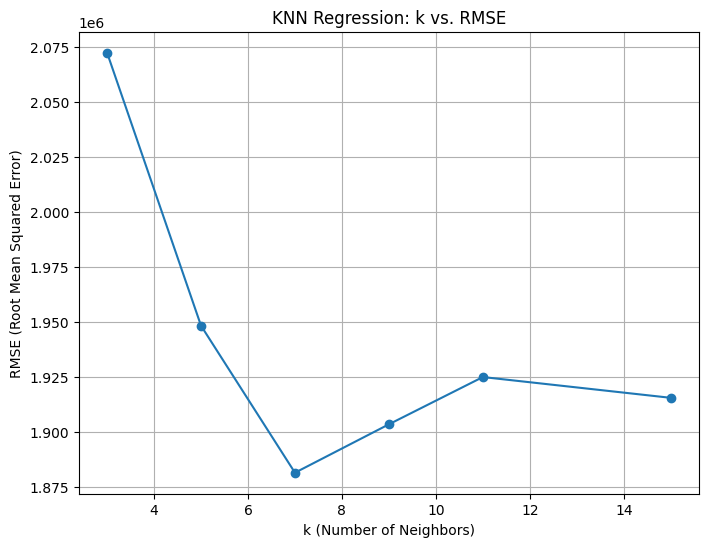

In [14]:
plt.figure(figsize=(8, 6))
plt.plot(k_values, rmse_scores, marker='o', linestyle='-')
plt.title('KNN Regression: k vs. RMSE')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('RMSE (Root Mean Squared Error)')
plt.grid(True)
plt.show()

In [15]:
best_k = k_values[np.argmin(rmse_scores)]
best_knn_reg = KNeighborsRegressor(n_neighbors=best_k)
best_knn_reg.fit(X_train, y_train)
new_data = np.array([[6.5, 15.0]])
new_prediction = best_knn_reg.predict(new_data)
print(f"\nPrediction for new data (k={best_k}): {new_prediction[0]:.2f}")



Prediction for new data (k=7): 6995000.00


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
